## Optimism and Pessimism Experiments

Replicates select results from **Anxiety, avoidance, and sequential evaluation** ([Zorowitz et al., 2020](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8143038/)).

In [1]:
# Uncomment below lines and run this cell to install neuronav and requirements for colab.

#!git clone https://github.com/awjuliani/neuro-nav
#!pip install ./neuro-nav[experiments_remote]

In [2]:
from neuronav.envs.grid_env import GridEnv, GridSize, GridObservation
from neuronav.envs.graph_env import GraphEnv
from neuronav.agents.td_agents import TDSR, TDQ
from neuronav.agents.mb_agents import MBV
from neuronav.envs.grid_templates import GridTemplate
from neuronav.envs.graph_templates import GraphTemplate
from neuronav.utils import run_episode, plot_values_and_policy
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

In [3]:
def simple_plot_returns(returns):
    returns = np.array(returns).reshape(-1, 10).mean(-1)
    plt.plot(returns)
    plt.xlabel("Episodes")
    plt.ylabel("Return")
    plt.show()

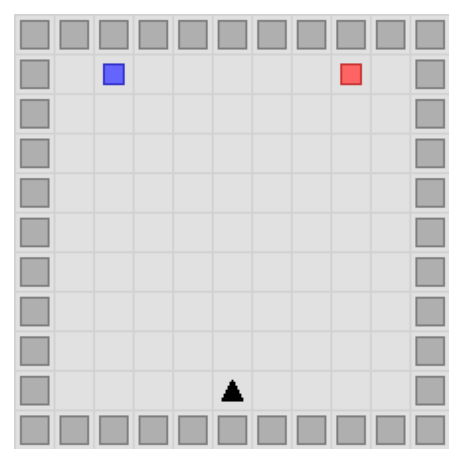

In [4]:
reward_map = {(1, 2): 1.0, (1, 8): -1.0}
start_pos = (9, 5)

env = GridEnv(size=GridSize.small)
obs = env.reset(objects={"rewards": reward_map}, agent_pos=start_pos)
env.render()

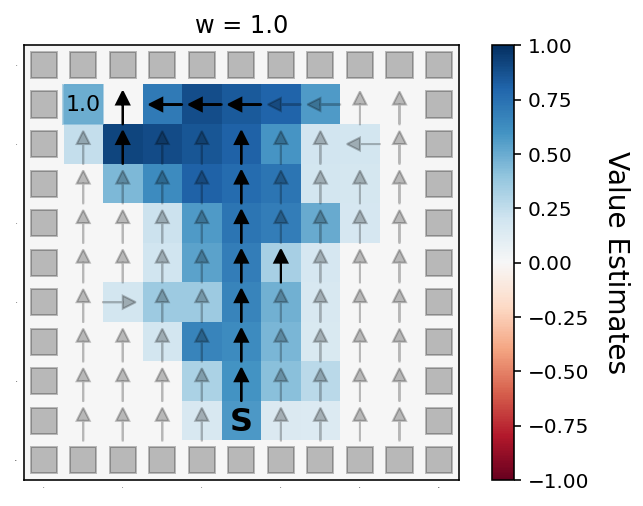

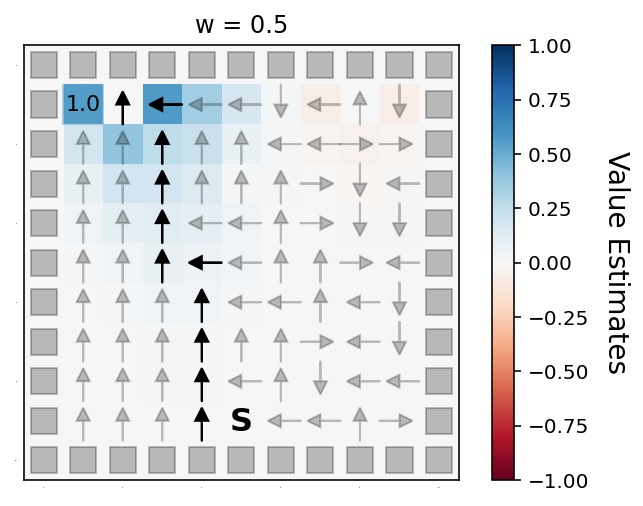

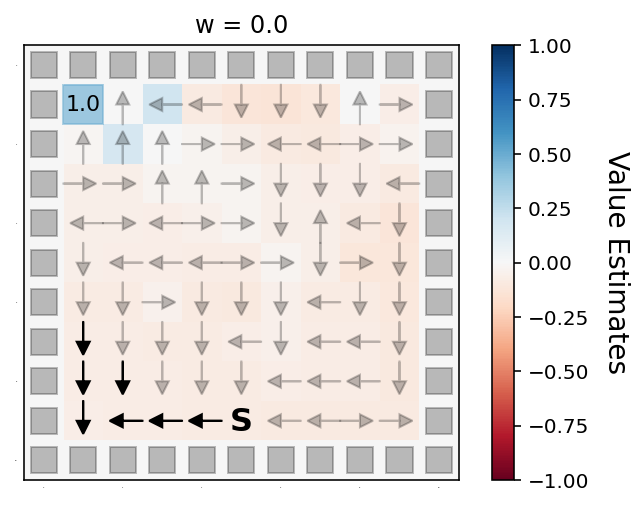

In [5]:
num_episodes = 100
num_steps = 50
w_values = [1.0, 0.5, 0.0]

for w_value in w_values:
    agent = MBV(
        env.state_size,
        env.action_space.n,
        lr=5e-2,
        poltype="egreedy",
        epsilon=0.25,
        gamma=0.95,
        w_value=w_value,
    )

    returns = []
    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env,
            agent,
            max_steps=num_steps,
            objects={"rewards": reward_map},
            start_pos=start_pos,
        )
        returns.append(ep_return)

    print()
    plot_values_and_policy(agent, env, start_pos, f"w = {w_value}")

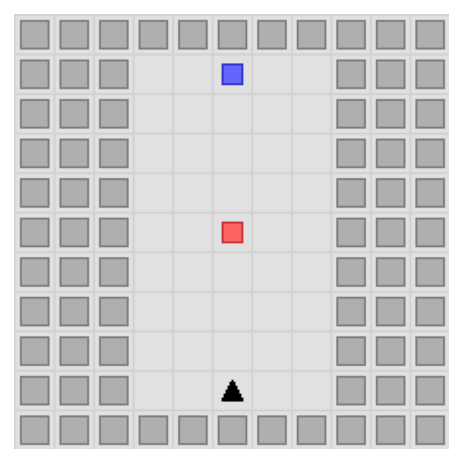

In [6]:
reward_map = {(1, 5): 1.0, (5, 5): -1.0}
start_pos = (9, 5)

env = GridEnv(size=GridSize.small)
obs = env.reset(objects={"rewards": reward_map}, agent_pos=start_pos)
add_blocks = [[i, 1] for i in range(1, env.grid_size - 1)]
env.blocks.extend(add_blocks)
add_blocks = [[i, 2] for i in range(1, env.grid_size - 1)]
env.blocks.extend(add_blocks)
add_blocks = [[i, 8] for i in range(1, env.grid_size - 1)]
env.blocks.extend(add_blocks)
add_blocks = [[i, 9] for i in range(1, env.grid_size - 1)]
env.blocks.extend(add_blocks)
env.render()

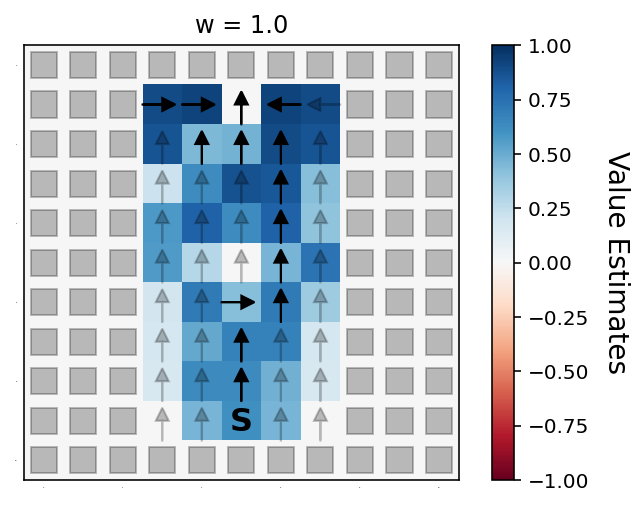

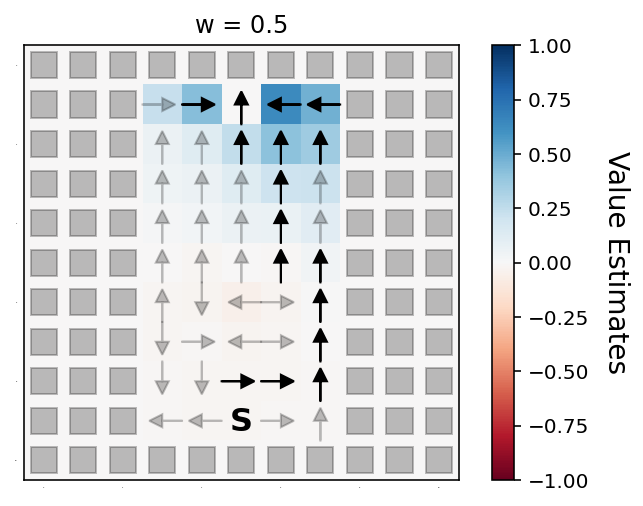

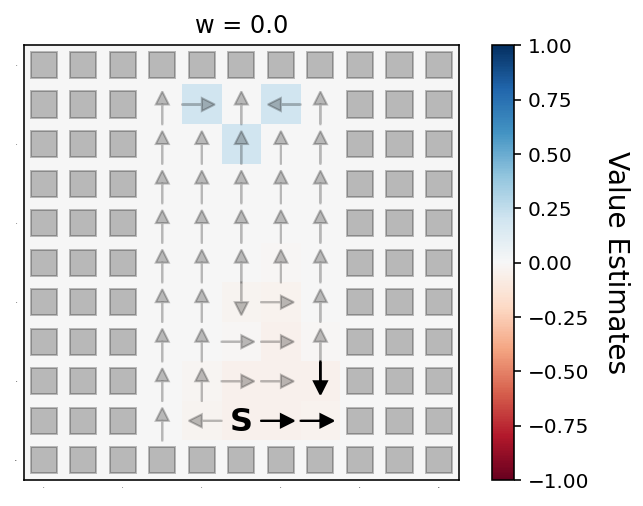

In [7]:
num_episodes = 100
num_steps = 50
w_values = [1.0, 0.5, 0.0]

for w_value in w_values:
    agent = MBV(
        env.state_size,
        env.action_space.n,
        lr=5e-2,
        poltype="egreedy",
        epsilon=0.25,
        gamma=0.95,
        w_value=w_value,
    )

    tot_returns = []
    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env,
            agent,
            max_steps=num_steps,
            objects={"rewards": reward_map},
            start_pos=start_pos,
        )
        tot_returns.append(ep_return)

    plot_values_and_policy(agent, env, start_pos, f"w = {w_value}")